In [188]:
import pandas as pd

data = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/mh_reservation(Query result).csv')

/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_1003/1268497154.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/mh_reservation(Query result).csv')


In [189]:
specific_location_id = '7e2a8a81-1462-11eb-89a4-42010a010003'
df = data[data['location_id'] == specific_location_id]
df

,id,location_id,party_size,kids_size,high_chair_size,seat_together,channel_name,section_id,notes,confirmation_no,reservation_time,cancellation_time,estimate_seconds,actual_dinein_time,actual_dineout_time,notify_party,reservation_status,user_id,created_time,modified_time
10,0001c3b4-32df-4f9b-b2c3-f2e5135cf5fb,7e2a8a81-1462-11eb-89a4-42010a010003,3,1,0,True,ONLINE,NaN,NaN,63,06/02/2022 23:10,NaN,0,NaN,NaN,True,I,3aefac33-d5e8-4b33-bbdf-08fbd2e1ef61,06/02/2022 23:10,06/02/2022 23:10
13,00023598-27ac-4203-a247-0e9d4f3cb1c0,7e2a8a81-1462-11eb-89a4-42010a010003,3,0,0,True,ONLINE,NaN,NaN,108,10/30/2021 22:43,NaN,0,10/30/2021 22:43,10/30/2021 23:45,True,C,f61c17b6-5839-4860-8032-77d20c63e945,10/30/2021 22:43,10/30/2021 23:45
14,0002a769-4a13-401d-905a-02541ba49405,7e2a8a81-1462-11eb-89a4-42010a010003,3,0,0,True,ONLINE,NaN,NaN,89,11/13/2021 1:46,NaN,0,11/13/2021 1:46,11/13/2021 16:38,True,C,6f0199f7-e0ac-4482-970a-7227e3991feb,11/13/2021 1:46,11/13/2021 16:38
15,0002ae19-0f50-4d71-adf9-b2c833f3844e,7e2a8a81-1462-11eb-89a4-42010a010003,1,0,0,True,ONLINE,NaN,NaN,59,5/23/2022 1:30,NaN,0,5/23/2022 1:30,5/24/2022 17:26,False,C,NaN,5/23/2022 1:30,5/24/2022 17:26
16,0002df69-cfe5-41ef-a10b-c588e4411cb9,7e2a8a81-1462-11eb-89a4-42010a010003,5,1,0,True,ONLINE,4e014b99-1468-11eb-89a4-42010a010007,NaN,13224,09/03/2023 17:16,NaN,0,09/03/2023 17:37,NaN,True,L,NaN,09/03/2023 17:16,09/03/2023 17:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325238,fffbd588-420a-4612-b812-d8c17eaa2d23,7e2a8a81-1462-11eb-89a4-42010a010003,3,1,0,True,ONLINE,NaN,NaN,3,3/26/2021 16:20,NaN,0,3/26/2021 16:20,3/26/2021 21:48,True,C,d4c19dfc-f98b-48b5-a562-7b686481624f,3/26/2021 16:20,3/26/2021 21:48
325242,fffd0a86-f36d-4dc2-bc5f-fda99a214bb6,7e2a8a81-1462-11eb-89a4-42010a010003,1,0,0,True,ONLINE,NaN,NaN,20,9/24/2021 21:33,NaN,0,9/24/2021 21:33,9/24/2021 21:34,True,C,02b4b292-2731-416c-ba5c-37f0b7bd83db,9/24/2021 21:33,9/24/2021 21:34
325249,fffea8ff-462b-4ddf-b13d-cefa971152e9,7e2a8a81-1462-11eb-89a4-42010a010003,4,0,0,True,ONLINE,NaN,NaN,58,07/04/2022 16:56,NaN,0,07/04/2022 16:56,07/04/2022 18:52,True,C,a379a79d-5fc3-4b2b-bb4e-d0c47bb00075,07/04/2022 16:56,07/04/2022 18:52
325250,fffee5b3-76af-4ee0-b7c3-aefe73049132,7e2a8a81-1462-11eb-89a4-42010a010003,3,0,0,True,ONLINE,NaN,NaN,28,3/13/2022 17:24,NaN,0,NaN,NaN,True,I,cf975d9c-ff78-46f8-a1c1-d851460e0f02,3/13/2022 17:24,3/13/2022 17:24


In [190]:
df = pd.DataFrame(df)

# Convert reservation_time to datetime format
df['reservation_time'] = pd.to_datetime(df['reservation_time'], format='%m/%d/%Y %H:%M')

# Extract the hour from reservation_time
df['hour'] = df['reservation_time'].dt.hour

# Define bins (hourly intervals from 0 to 23)
bins = list(range(0, 25))  # Bins for each hour of the day (24 hours)
labels = [f'{i:02d}:00-{i+1:02d}:00' for i in range(0, 24)]  # Labels for each hour interval

# Categorize the hours into bins
df['time_bin'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False, include_lowest=True)

# Count the number of reservations in each bin
reservation_counts = df['time_bin'].value_counts().sort_index()

print(reservation_counts)

time_bin
00:00-01:00    17793
01:00-02:00    10890
02:00-03:00     2218
03:00-04:00       79
04:00-05:00       11
05:00-06:00        5
06:00-07:00        7
07:00-08:00        1
08:00-09:00        2
09:00-10:00        2
10:00-11:00        2
11:00-12:00        2
12:00-13:00       11
13:00-14:00        4
14:00-15:00       12
15:00-16:00     2443
16:00-17:00     8362
17:00-18:00    11883
18:00-19:00    10291
19:00-20:00     5159
20:00-21:00     1126
21:00-22:00     2138
22:00-23:00     7519
23:00-24:00    14956
Name: count, dtype: int64


In [191]:
df.head(5)

,id,location_id,party_size,kids_size,high_chair_size,seat_together,channel_name,section_id,notes,confirmation_no,...,estimate_seconds,actual_dinein_time,actual_dineout_time,notify_party,reservation_status,user_id,created_time,modified_time,hour,time_bin
10,0001c3b4-32df-4f9b-b2c3-f2e5135cf5fb,7e2a8a81-1462-11eb-89a4-42010a010003,3,1,0,True,ONLINE,NaN,NaN,63,...,0,NaN,NaN,True,I,3aefac33-d5e8-4b33-bbdf-08fbd2e1ef61,06/02/2022 23:10,06/02/2022 23:10,23,23:00-24:00
13,00023598-27ac-4203-a247-0e9d4f3cb1c0,7e2a8a81-1462-11eb-89a4-42010a010003,3,0,0,True,ONLINE,NaN,NaN,108,...,0,10/30/2021 22:43,10/30/2021 23:45,True,C,f61c17b6-5839-4860-8032-77d20c63e945,10/30/2021 22:43,10/30/2021 23:45,22,22:00-23:00
14,0002a769-4a13-401d-905a-02541ba49405,7e2a8a81-1462-11eb-89a4-42010a010003,3,0,0,True,ONLINE,NaN,NaN,89,...,0,11/13/2021 1:46,11/13/2021 16:38,True,C,6f0199f7-e0ac-4482-970a-7227e3991feb,11/13/2021 1:46,11/13/2021 16:38,1,01:00-02:00
15,0002ae19-0f50-4d71-adf9-b2c833f3844e,7e2a8a81-1462-11eb-89a4-42010a010003,1,0,0,True,ONLINE,NaN,NaN,59,...,0,5/23/2022 1:30,5/24/2022 17:26,False,C,NaN,5/23/2022 1:30,5/24/2022 17:26,1,01:00-02:00
16,0002df69-cfe5-41ef-a10b-c588e4411cb9,7e2a8a81-1462-11eb-89a4-42010a010003,5,1,0,True,ONLINE,4e014b99-1468-11eb-89a4-42010a010007,NaN,13224,...,0,09/03/2023 17:37,NaN,True,L,NaN,09/03/2023 17:16,09/03/2023 17:42,17,17:00-18:00


In [192]:
import pandas as pd
import pytz

# Example DataFrame
df = pd.DataFrame(df)

# Define the US Eastern timezone
#us_eastern = pytz.timezone('US/Eastern')

# Convert reservation_time to datetime format and set timezone to US Eastern
df['reservation_time'] = pd.to_datetime(df['reservation_time'], format='%m/%d/%Y %H:%M')

# Extract the day of the week and store it in a new column 'weekday'
df['weekday'] = df['reservation_time'].dt.day_name()

print(df)



                                          id  \
10      0001c3b4-32df-4f9b-b2c3-f2e5135cf5fb   
13      00023598-27ac-4203-a247-0e9d4f3cb1c0   
14      0002a769-4a13-401d-905a-02541ba49405   
15      0002ae19-0f50-4d71-adf9-b2c833f3844e   
16      0002df69-cfe5-41ef-a10b-c588e4411cb9   
...                                      ...   
325238  fffbd588-420a-4612-b812-d8c17eaa2d23   
325242  fffd0a86-f36d-4dc2-bc5f-fda99a214bb6   
325249  fffea8ff-462b-4ddf-b13d-cefa971152e9   
325250  fffee5b3-76af-4ee0-b7c3-aefe73049132   
325251  fffeedd0-893c-4dbd-b6cd-05c030f0dbec   

                                 location_id  party_size  kids_size  \
10      7e2a8a81-1462-11eb-89a4-42010a010003           3          1   
13      7e2a8a81-1462-11eb-89a4-42010a010003           3          0   
14      7e2a8a81-1462-11eb-89a4-42010a010003           3          0   
15      7e2a8a81-1462-11eb-89a4-42010a010003           1          0   
16      7e2a8a81-1462-11eb-89a4-42010a010003           5          1 

In [193]:
df.columns

Index(['id', 'location_id', 'party_size', 'kids_size', 'high_chair_size',
       'seat_together', 'channel_name', 'section_id', 'notes',
       'confirmation_no', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'notify_party', 'reservation_status', 'user_id', 'created_time',
       'modified_time', 'hour', 'time_bin', 'weekday'],
      dtype='object')

In [194]:
res_table = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/mh_reservation_table(Query result).csv')

In [195]:
specific_location_id = '7e2a8a81-1462-11eb-89a4-42010a010003'
res_table = res_table[res_table['location_id'] == specific_location_id]

In [196]:
merge = pd.merge(df, res_table, left_on='id', right_on='reservation_id',how='right')

In [197]:
merge.columns

Index(['id_x', 'location_id_x', 'party_size', 'kids_size', 'high_chair_size',
       'seat_together', 'channel_name', 'section_id_x', 'notes',
       'confirmation_no', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'notify_party', 'reservation_status', 'user_id', 'created_time_x',
       'modified_time_x', 'hour', 'time_bin', 'weekday', 'id_y',
       'reservation_id', 'location_id_y', 'section_id_y', 'table_id',
       'staff_id', 'guest_seated', 'assignment_time', 'created_time_y',
       'modified_time_y'],
      dtype='object')

In [198]:
import pandas as pd

# Assuming merge['assignment_time'] and merge['reservation_time'] are your datetime columns

# Convert to datetime if not already
merge['assignment_time'] = pd.to_datetime(merge['assignment_time'], errors='coerce')
merge['reservation_time'] = pd.to_datetime(merge['reservation_time'], errors='coerce')

# Localize naive datetimes to US Eastern timezone first, if they are not already timezone-aware
if merge['assignment_time'].dt.tz is None:
    merge['assignment_time'] = merge['assignment_time'].dt.tz_localize('US/Eastern', ambiguous='NaT', nonexistent='NaT')
else:
    merge['assignment_time'] = merge['assignment_time'].dt.tz_convert('US/Eastern')

if merge['reservation_time'].dt.tz is None:
    merge['reservation_time'] = merge['reservation_time'].dt.tz_localize('US/Eastern', ambiguous='NaT', nonexistent='NaT')
else:
    merge['reservation_time'] = merge['reservation_time'].dt.tz_convert('US/Eastern')

# Now perform your operation
merge['ETA'] = (merge['assignment_time'] - merge['reservation_time']).dt.total_seconds() / 60

# If not needed, convert back to timezone-naive
merge['assignment_time'] = merge['assignment_time'].dt.tz_convert(None)
merge['reservation_time'] = merge['reservation_time'].dt.tz_convert(None)


In [199]:
table = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/mh_table(Query result).csv')

In [200]:
merge_2 = pd.merge(res_table,table,left_on='table_id',right_on='id',how='left')

In [201]:
merge_4 = pd.merge(merge,table,left_on='table_id',right_on='id',how='left')

In [202]:
merge_4.columns

Index(['id_x', 'location_id_x', 'party_size', 'kids_size', 'high_chair_size',
       'seat_together', 'channel_name', 'section_id_x', 'notes',
       'confirmation_no', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'notify_party', 'reservation_status', 'user_id', 'created_time_x',
       'modified_time_x', 'hour', 'time_bin', 'weekday', 'id_y',
       'reservation_id', 'location_id_y', 'section_id_y', 'table_id',
       'staff_id', 'guest_seated', 'assignment_time', 'created_time_y',
       'modified_time_y', 'ETA', 'id', 'location_id', 'section_id',
       'table_name', 'attributes', 'min_capacity', 'max_capacity',
       'assigned_staff_id', 'assigned_time', 'status', 'sort_order',
       'is_enabled', 'created_time', 'modified_time'],
      dtype='object')

In [203]:
merge_4=merge_4.drop(columns=['seat_together','channel_name','section_id_x','notes','confirmation_no','notify_party','user_id','created_time_x','modified_time_x','id_y','reservation_id','location_id_y','section_id_y','staff_id','guest_seated','created_time_y','modified_time_y','id','location_id','section_id','attributes','assigned_staff_id','assigned_time','status','sort_order','created_time','modified_time'])

In [204]:
merge_4 = merge_4.rename(columns={
    'id_x':'reservation_id',
    'location_id_x':'locaion_id',
})

In [205]:
merge_4.columns

Index(['reservation_id', 'locaion_id', 'party_size', 'kids_size',
       'high_chair_size', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'reservation_status', 'hour', 'time_bin', 'weekday', 'table_id',
       'assignment_time', 'ETA', 'table_name', 'min_capacity', 'max_capacity',
       'is_enabled'],
      dtype='object')

In [206]:
merge_4.to_csv('/Users/apple/Downloads/ML/ETA_checkin/results/final_merge.csv')

In [207]:
import pandas as pd
import pytz

# Assuming your DataFrame is read from a CSV file containing reservation and assignment times
df = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/results/final_merge.csv')

# Convert reservation_time and assignment_time to datetime objects and localize to Eastern Time
eastern_tz = pytz.timezone('US/Eastern')  # Eastern Time (ET) timezone

# Function to handle ambiguous datetimes during localization
def localize_datetime(dt):
    try:
        return pd.Timestamp(dt).tz_localize(eastern_tz, ambiguous='NaT', nonexistent='NaT')
    except Exception as e:
        print(f"Error while localizing datetime: {e}")
        return pd.NaT  # Return NaT for any errors during localization

df['reservation_time'] = df['reservation_time'].apply(localize_datetime)
df['assignment_time'] = df['assignment_time'].apply(localize_datetime)

queue_sizes = []

for i in range(len(df)):
    current_reservation_time = df.loc[i, 'reservation_time']
    current_dinein_time = df.loc[i, 'assignment_time']
    
    # Filter relevant rows based on reservation_time and assignment_time
    relevant_rows = df[(df['reservation_time'] <= current_reservation_time) & 
                       (df['assignment_time'] >= current_reservation_time)]
    
    queue_size = len(relevant_rows) - 1  # Calculate queue size excluding the current reservation itself
    queue_sizes.append(queue_size)

# Add the queue_sizes list as a new column in the DataFrame
df['queue_size'] = queue_sizes

# Save the updated DataFrame back to CSV
df.to_csv('/Users/apple/Downloads/ML/ETA_checkin/results/final_merge_1.csv', index=False)

print("Queue sizes have been calculated and added to the CSV file.")


/var/folders/6w/9qtyzjdd3q3g7fk06nhhv8v00000gn/T/ipykernel_1003/2635565587.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/apple/Downloads/ML/ETA_checkin/results/final_merge.csv')


Queue sizes have been calculated and added to the CSV file.


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Convert to DataFrame
df = pd.DataFrame(df)

# Convert to datetimea
df['reservation_time'] = pd.to_datetime(df['reservation_time'], format='%m/%d/%Y %H:%M')

# Extract day, month, hour, and weekday
df['day'] = df['reservation_time'].dt.day
df['month'] = df['reservation_time'].dt.month
#df['hour'] = df['reservation_time'].dt.hour
#df['weekday'] = df['reservation_time'].dt.dayofweek  # Monday=0, Sunday=6

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

# Display the dataframe
print(df.head())


   Unnamed: 0                        reservation_id  \
0           0  62322b8e-b75b-4ad3-9830-ad1c0f9b18ab   
1           1  2ae2b5d3-8967-40c0-b9fd-7689be4c951a   
2           2  387a711e-6e90-4b3e-a6a3-cf60b220a393   
3           3  096f4fda-35ea-4db9-b0f4-6209e1ee256b   
4           4  6891fa3a-589c-4156-8f35-5bd0ac24a22c   

                             locaion_id  party_size  kids_size  \
0  7e2a8a81-1462-11eb-89a4-42010a010003         1.0        0.0   
1  7e2a8a81-1462-11eb-89a4-42010a010003         1.0        0.0   
2  7e2a8a81-1462-11eb-89a4-42010a010003         4.0        1.0   
3  7e2a8a81-1462-11eb-89a4-42010a010003         2.0        0.0   
4  7e2a8a81-1462-11eb-89a4-42010a010003         1.0        0.0   

   high_chair_size          reservation_time cancellation_time  \
0              0.0 2022-02-06 07:23:00-05:00               NaN   
1              0.0 2021-05-14 02:10:00-04:00               NaN   
2              0.0 2023-01-16 03:32:00-05:00               NaN   
3       

In [209]:
df.columns

Index(['Unnamed: 0', 'reservation_id', 'locaion_id', 'party_size', 'kids_size',
       'high_chair_size', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'reservation_status', 'hour', 'time_bin', 'weekday', 'table_id',
       'assignment_time', 'ETA', 'table_name', 'min_capacity', 'max_capacity',
       'is_enabled', 'queue_size', 'day', 'month', 'season'],
      dtype='object')

In [210]:
import pandas as pd

# Read the CSV file into a DataFrame
#df = pd.read_csv("/Users/apple/Downloads/ML/ETA_checkin/results/final_merge_1.csv")

# Convert 'reservation_time' column to datetime if it's not already
df['reservation_time'] = pd.to_datetime(df['reservation_time'])

# Sort by 'reservation_time' column (oldest to newest)
df_sorted = df.sort_values(by='reservation_time')

df_sorted.drop(columns='Unnamed: 0',inplace=True)

df_sorted.to_csv("/Users/apple/Downloads/ML/ETA_checkin/results/final_merge_1.csv")

In [211]:
df_sorted['high_chair_size'] = df_sorted['high_chair_size'].apply(lambda x: 1 if x > 0 else 0)

In [212]:
df_sorted.to_csv("/Users/apple/Downloads/ML/ETA_checkin/results/final_merge_1.csv")

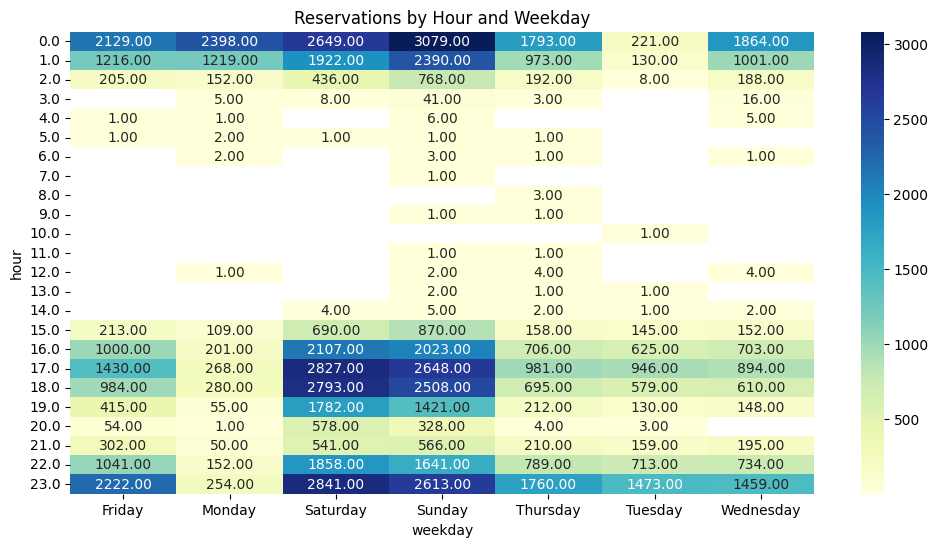

In [215]:
# Heatmap for reservations by hour and weekday
heatmap_data_hour_weekday = df_sorted.pivot_table(index='hour', columns='weekday', values='reservation_time', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_hour_weekday, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Reservations by Hour and Weekday')
plt.show()

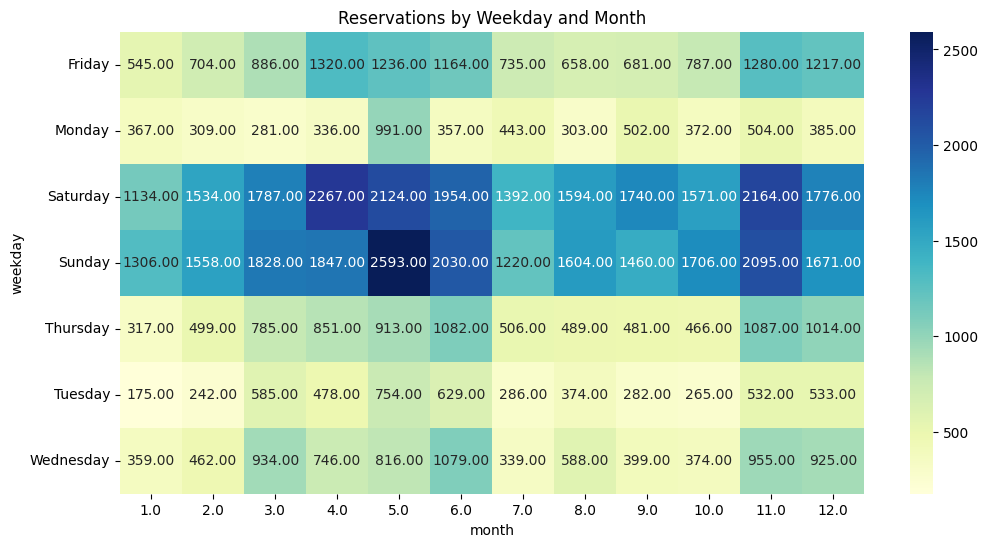

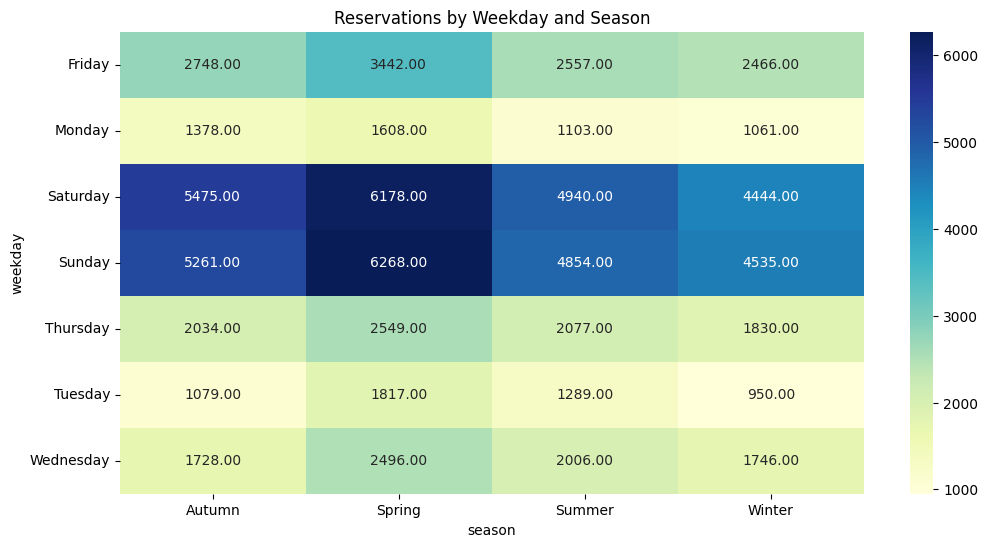

In [216]:
heatmap_data_weekday_month = df_sorted.pivot_table(index='weekday', columns='month', values='reservation_time', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_weekday_month, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Reservations by Weekday and Month')
plt.show()

# Heatmap for reservations by aweekday and season
heatmap_data_weekday_season = df_sorted.pivot_table(index='weekday', columns='season', values='reservation_time', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_weekday_season, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Reservations by Weekday and Season')
plt.show()

In [217]:
df_sorted.columns

Index(['reservation_id', 'locaion_id', 'party_size', 'kids_size',
       'high_chair_size', 'reservation_time', 'cancellation_time',
       'estimate_seconds', 'actual_dinein_time', 'actual_dineout_time',
       'reservation_status', 'hour', 'time_bin', 'weekday', 'table_id',
       'assignment_time', 'ETA', 'table_name', 'min_capacity', 'max_capacity',
       'is_enabled', 'queue_size', 'day', 'month', 'season'],
      dtype='object')

In [219]:
df_sorted = df_sorted[['reservation_id','locaion_id','party_size','high_chair_size','reservation_time','hour','weekday','ETA','queue_size','day','month','season']]

In [220]:
df_sorted.to_csv('/Users/apple/Downloads/ML/ETA_checkin/results/model_input.csv')

In [226]:
df_sorted = df_sorted.rename(columns={'location_i':'location_id'})

In [228]:
df_sorted.columns

Index(['reservation_id', 'location_id', 'party_size', 'high_chair_size',
       'reservation_time', 'hour', 'weekday', 'ETA', 'queue_size', 'day',
       'month', 'season'],
      dtype='object')

## MODEL

In [238]:
import numpy as np
import pandas as pd

# Import CSV file
#file_path = '/mnt/data/your_file.csv'  # Update with your actual file path
#df = pd.read_csv(file_path)

# Ensure 'ETA' column exists
if 'ETA' in df_sorted.columns:
    # Calculate Z-score for the 'ETA' column
    df_sorted['z_score'] = (df_sorted['ETA'] - df_sorted['ETA'].mean()) / df_sorted['ETA'].std()

    # Identify outliers
    outliers = df_sorted[df_sorted['z_score'].abs() > 3]

    # Print outliers
    print("Outliers detected:")
    print(outliers)

    # Remove outliers
    df_cleaned = df_sorted[df_sorted['z_score'].abs() <= 3].copy()

    # Drop the z_score column from the cleaned dataframe
    df_cleaned.drop(columns=['z_score'], inplace=True)

    # Print cleaned dataframe
    print("Data after removing outliers:")
    print(df_cleaned)

    # Optionally, save the cleaned dataframe to a new CSV file
    cleaned_file_path = '/Users/apple/Downloads/ML/ETA_checkin/results/model_input.csv'  # Update with desired path
    df_cleaned.to_csv(cleaned_file_path, index=False)
else:
    print("Column 'ETA' not found in the dataset")


Outliers detected:
                             reservation_id  \
73769  0990d8c6-43d8-4b22-832d-ba4da702aae4   
47696  79ddc9b6-a655-4f2c-b786-fec921dda231   
36024  616f7313-9f2b-444a-8aa0-2d1eabfc504f   
68268  b45f2d80-910b-45a5-91d4-30ec644142c2   
12116  4a9bb5b1-c8f5-4698-bad1-cb2c913b5597   
841    a4fd3e42-3313-43ce-aa43-8b41721b9888   

                                location_id  party_size  high_chair_size  \
73769  7e2a8a81-1462-11eb-89a4-42010a010003         8.0                0   
47696  7e2a8a81-1462-11eb-89a4-42010a010003         3.0                0   
36024  7e2a8a81-1462-11eb-89a4-42010a010003         3.0                0   
68268  7e2a8a81-1462-11eb-89a4-42010a010003         1.0                0   
12116  7e2a8a81-1462-11eb-89a4-42010a010003         1.0                0   
841    7e2a8a81-1462-11eb-89a4-42010a010003         2.0                0   

               reservation_time  hour    weekday      ETA  queue_size   day  \
73769 2021-06-10 22:52:00-04:00  18.0  

In [1]:
import csv

# Define the data
holidays = [
    ["Holiday", "Date"],
    ["New Year's Day", "01-01"],
    ["Lohri", "01-13"],
    ["Makar Sankranti", "01-14"],
    ["Pongal", "01-14"],
    ["Indian Republic Day", "01-26"],
    ["Martin Luther King Jr. Day", "01-18"],
    ["Valentine's Day", "02-14"],
    ["Presidents' Day", "02-15"],
    ["Maha Shivaratri", "03-11"],
    ["International Women's Day", "03-08"],
    ["Holi", "03-29"],
    ["Ugadi", "04-13"],
    ["Tamil New Year", "04-14"],
    ["Vishu", "04-14"],
    ["Baisakhi", "04-14"],
    ["Good Friday", "04-02"],
    ["Easter", "04-04"],
    ["Mother's Day", "05-09"],
    ["Memorial Day", "05-31"],
    ["Father's Day", "06-20"],
    ["International Children's Day", "06-01"],
    ["US Independence Day", "07-04"],
    ["Raksha Bandhan", "08-22"],
    ["Onam", "08-21"],
    ["Indian Independence Day", "08-15"],
    ["Janmashtami", "08-30"],
    ["Ganesh Chaturthi", "09-10"],
    ["Labor Day", "09-06"],
    ["Dussehra", "10-15"],
    ["Columbus Day", "10-11"],
    ["Gandhi Jayanti", "10-02"],
    ["Karva Chauth", "10-24"],
    ["Halloween", "10-31"],
    ["Bhai Dooj", "11-06"],
    ["Diwali", "11-04"],
    ["Veterans Day", "11-11"],
    ["Thanksgiving Day", "11-25"],
    ["Children's Day (India)", "11-14"],
    ["Christmas Day", "12-25"],
    ["Hanukkah", "11-28"],  # Hanukkah dates vary each year
    ["Kwanzaa", "12-26"]
]

# Write the data to a CSV file
with open('C:\\Users\\Admin\\Downloads\\ETA_checkin\\ETA_checkin\\final\\holidays_2021.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(holidays)

print("CSV file created successfully.")


CSV file created successfully.
